In [177]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.misc import imresize
from skimage.color import rgb2gray
%matplotlib inline
imagedir  = '../../data/dogs/Images'

In [178]:
def load_images():
    num_samples_per_breed = 50 # number of samples of each breed
    num_breeds = 60
    h = 200
    w = 200
    
    # preinitialize the matrix
    img_arr = np.empty((num_samples_per_breed*num_breeds,h*w))  # 20 instances of each breed, each img will be 200x200 = 40000 pixels
    label_arr = []
    i = 0
    
    # sample 60 breeds from the dataset
    breed_sample_idx = np.random.randint(low=1, high=len(os.listdir(imagedir)), size=(num_breeds))
    for idx in breed_sample_idx:
        breed = os.listdir(imagedir)[idx]
        if breed[0] == '.' : continue # stupid ds.store on mac
        print(breed)
        
        # sample 50 images from the breed
        img_sample_idx = np.random.randint(low=1, high=len(os.listdir(os.path.join(imagedir,breed))), size=(num_samples_per_breed))
        for idx in img_sample_idx:
            dog_path = os.path.join(imagedir,breed,os.listdir(os.path.join(imagedir,breed))[idx])
            img = plt.imread(dog_path)
            
            # converts image to gray, resizes it to be 200x200, and then linearizes it
            img_gray_resize_flat = rgb2gray(imresize(img, (h,w,3))).flatten()
                        
            img_arr[i] = img_gray_resize_flat
            i = i + 1

            # add name to list of labels
            fname = dog_path.split('/')[-1] # 'dog_name_123497.jpg'
            dog_name = fname[:fname.rfind('_')] # 'dog_name'
            label_arr.append(dog_name)
            
    return img_arr, label_arr

In [179]:
%%time
dogs, labels = load_images()

Labrador_retriever
Irish_terrier
Scotch_terrier
Scottish_deerhound
basenji
Pekinese
boxer
Irish_water_spaniel
bull_mastiff
silky_terrier
English_foxhound
wire
dhole
golden_retriever
Mexican_hairless
Saint_Bernard
beagle
Chesapeake_Bay_retriever
dingo
beagle
Irish_wolfhound
flat
Great_Pyrenees
Afghan_hound
toy_terrier
pug
Norfolk_terrier
Australian_terrier
malinois
giant_schnauzer
vizsla
Appenzeller
Norfolk_terrier
Norwegian_elkhound
toy_poodle
Samoyed
Appenzeller
malinois
Dandie_Dinmont
Rottweiler
Airedale
EntleBucher
Old_English_sheepdog
Australian_terrier
cairn
Mexican_hairless
briard
redbone
Bedlington_terrier
basset
redbone
Brittany_spaniel
whippet
redbone
Great_Pyrenees
Chesapeake_Bay_retriever
Rottweiler
Irish_terrier
Staffordshire_bullterrier
komondor
Wall time: 20.5 s


In [87]:
import pandas as pd

df = pd.DataFrame(dogs)
df.head()

0         1         2         3         4         5         6      \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.567263  0.537848  0.515182  0.534798  0.557800  0.569014  0.595333   
2  0.327761  0.313473  0.292176  0.269480  0.252104  0.237534  0.222681   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.500858  0.507867  0.407879  0.349078  0.323049  0.347717  0.348573   

      7         8         9        ...        39990     39991     39992  \
0  0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.000000   
1  0.595310  0.614055  0.661932    ...     0.307412  0.288935  0.305157   
2  0.214265  0.207255  0.196606    ...     0.297816  0.266444  0.223589   
3  0.003922  0.003922  0.003922    ...     0.895828  0.892189  0.878750   
4  0.394798  0.403743  0.372370    ...     0.762290  0.754729  0.721407   

      39993     39994     39995     39996     39997     39998     39999  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.578834  0.597058  0.468762  0.465100  0.419135  0.433124  0.301472  
2  0.262805  0.305942  0.266726  0.227511  0.313785  0.305942  0.247118  
3  0.839274  0.806792  0.823595  0.753855  0.662839  0.632032  0.636236  
4  0.724496  0.748858  0.757840  0.760929  0.757007  0.758956  0.759790  

[5 rows x 40000 columns]

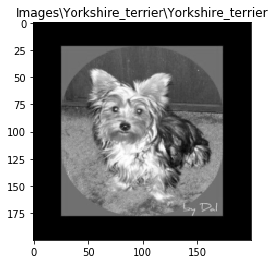

In [88]:
ex = dogs[0].reshape((200,200))
plt.imshow(ex, cmap='gray')
plt.title(labels[0])
plt.show()

In [89]:
# taken from Class Demo #4
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=1.5, top=.90, hspace=.35)
    
    # with slight modification
    # sample = np.random.randint(low=0, high=images.shape[0], size=n_row*n_col)
    sample = np.arange(n_row*n_col)
    
    for i, idx in enumerate(sample):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[idx].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[idx], size=12)
        plt.xticks(())
        plt.yticks(())

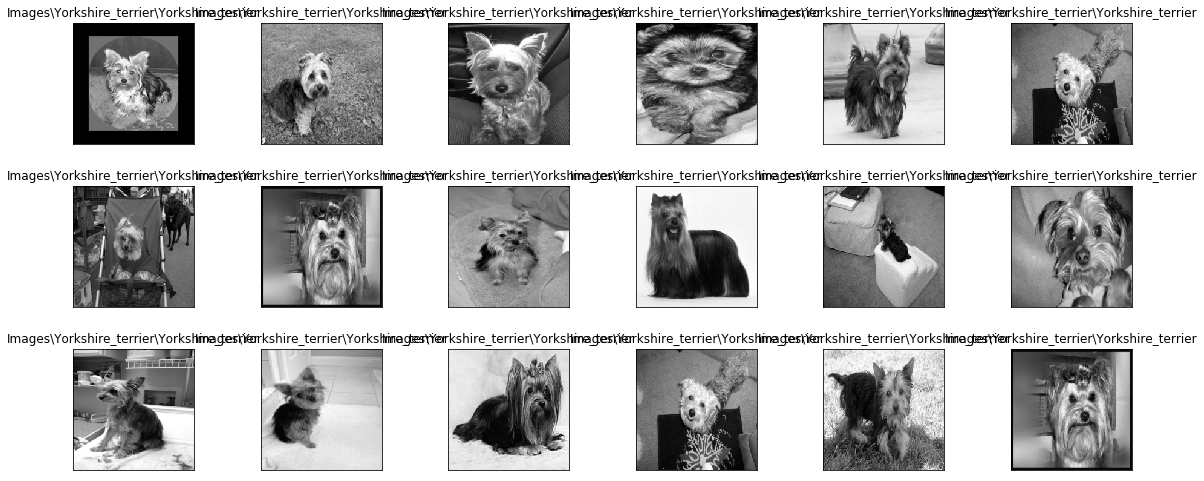

In [90]:
plot_gallery(dogs, labels, 200, 200) # defaults to showing a 3 by 6 subset of the faces

# Linear Dimensionality Reduction
## Full PCA

    First, lets' find the maixum number of principle components required to have improvement on explained variance ratio. 

In [91]:
h = 200
w = 200

In [122]:
from sklearn.decomposition import PCA

n_components = 3000
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, dogs.shape[0]))
pca = PCA(n_components=n_components)
%time pca.fit(dogs.copy())
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 3000 eigenfaces from 3000 faces
Wall time: 47.6 s


In [123]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Scatter, Marker, Layout, XAxis, YAxis, Bar, Line
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
      

In [124]:
plot_explained_variance(pca)

    According to the graph above, the number of components greater than 1000 will not have effective imporvement on the explained variance ratio anymore. Therefore, we decieded to take 1000 as the number of components for the PCA. 

In [130]:
n_components = 1000
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, dogs.shape[0]))
pca = PCA(n_components=n_components)
%time pca.fit(dogs.copy())
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 1000 eigenfaces from 3000 faces
Wall time: 32.8 s


In [131]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

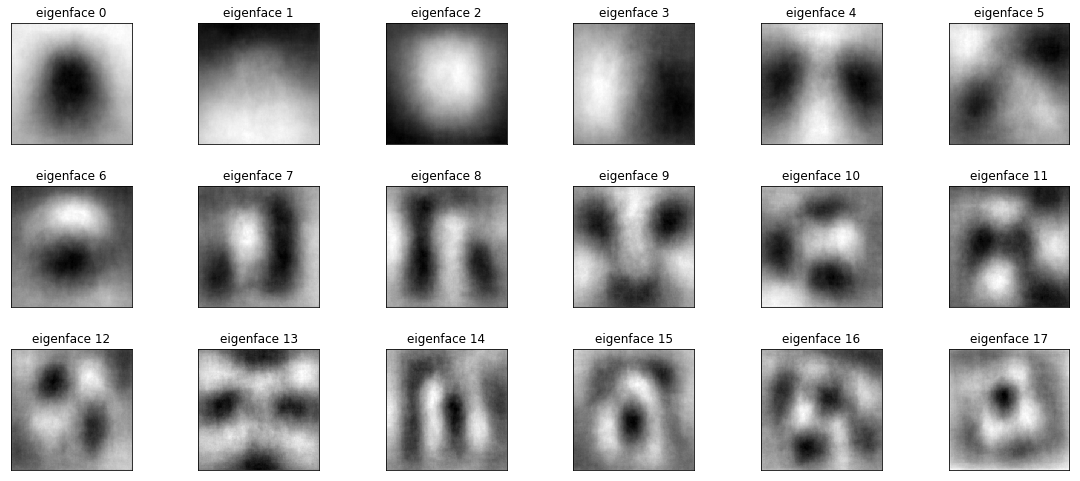

In [132]:
plot_gallery(eigenfaces, eigenface_titles, h, w)

In [133]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

In [147]:
dogs_to_reconstruct = 1    
dogs_idx = dogs[dogs_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,dogs_idx.reshape(1, -1))

In [148]:
plt.subplot(1,3,1)
plt.imshow(dogs_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid()

    As we can see friom the comparion, although the reconstructed image is less clear, it's very close to the orginal image. 1000 components has covered around 97% of the variance of the overall image dataset. 

# Randomized PCA

    Lets make another try with random PCA which makes PCA of randomly selected samples, and make an comparison.  

In [157]:
n_components = 3000
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, dogs.shape[0]))

rpca = PCA(n_components=n_components,svd_solver='randomized')
%time rpca.fit(dogs.copy())
eigenfaces = rpca.components_.reshape((n_components, h, w))

Extracting the top 3000 eigenfaces from 3000 faces
Wall time: 2min 49s


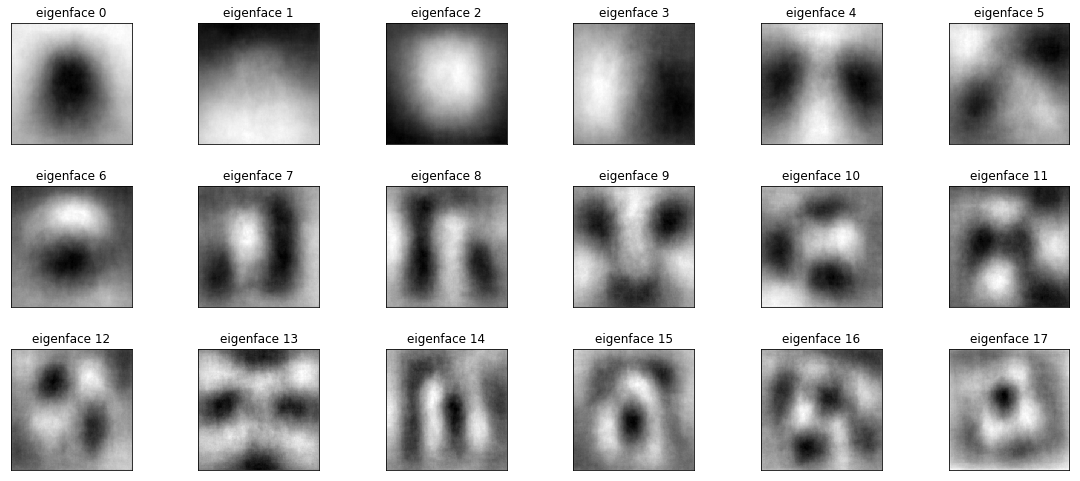

In [158]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)


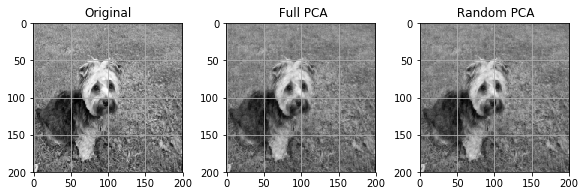

In [162]:
dogs_to_reconstruct = 1    
dogs_idx = dogs[dogs_to_reconstruct]
low_dimensional_representation, reconstructed_image_random = reconstruct_image(rpca,dogs_idx.reshape(1, -1))
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,dogs_idx.reshape(1, -1))

plt.figure(figsize=(1.7 * 3, 2.3 * 1))
plt.subplots_adjust(bottom=0, left=.01, right=1.5, top=.90, hspace=.35)
    
#origin
plt.subplot(1,3,1)
plt.imshow(dogs_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
#Full PCA
plt.subplot(1,3,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title(' Full PCA')
plt.grid()
#Random PCA
plt.subplot(1,3,3)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title(' Random PCA')
plt.grid()



    As we can see, the reconstructed images are very similar since they are using the same PCA approach.

# Non-linear Dimensionality Reduction
## Kernal PCA

        Since the implementation of kernal PCA takes too long for the whole dataset, we choose to implement it only for a subgroud of the data, the 1000 images instead of 3000.We will take 20 images from each 50 classes. 

In [342]:
imagedir_blood = '../../data/dogs/Images'
def load_images_blood():
    num_samples_per_breed = 20 # number of samples of each breed
    num_breeds = 50
    h = 200
    w = 200
    
    # preinitialize the matrix
    img_arr = np.empty((num_samples_per_breed*num_breeds,h*w))  # 20 instances of each breed, each img will be 200x200 = 40000 pixels
    label_arr = []
    i = 0
    
    # sample 60 breeds from the dataset
    breed_sample_idx = np.random.randint(low=1, high=len(os.listdir(imagedir)), size=(num_breeds))
    for idx in breed_sample_idx:
        breed = os.listdir(imagedir)[idx]
        if breed[0] == '.' : continue # stupid ds.store on mac
        print(breed)
        
        # sample 50 images from the breed
        img_sample_idx = np.random.randint(low=1, high=len(os.listdir(os.path.join(imagedir,breed))), size=(num_samples_per_breed))
        for idx in img_sample_idx:
            dog_path = os.path.join(imagedir,breed,os.listdir(os.path.join(imagedir,breed))[idx])
            img = plt.imread(dog_path)
            
            # converts image to gray, resizes it to be 200x200, and then linearizes it
            img_gray_resize_flat = rgb2gray(imresize(img, (h,w,3))).flatten()
                        
            img_arr[i] = img_gray_resize_flat
            i = i + 1

            # add name to list of labels
            fname = dog_path.split('/')[-1] # 'dog_name_123497.jpg'
            dog_name = fname[:fname.rfind('_')] # 'dog_name'
            label_arr.append(dog_name)
            
    return img_arr, label_arr

In [343]:
dogs_blood, labels_blood = load_images_blood()

Afghan_hound
kelpie
collie
pug
keeshond
Border_terrier
Norfolk_terrier
Sealyham_terrier
Shetland_sheepdog
EntleBucher
German_shepherd
Chihuahua
black
Samoyed
Rottweiler
Italian_greyhound
basenji
Irish_terrier
Sealyham_terrier
kelpie
American_Staffordshire_terrier
African_hunting_dog
Cardigan
Bouvier_des_Flandres
miniature_schnauzer
Bouvier_des_Flandres
Cardigan
Norfolk_terrier
Tibetan_terrier
Border_terrier
vizsla
Bouvier_des_Flandres
Eskimo_dog
silky_terrier
wire
Cardigan
Airedale
boxer
Newfoundland
Maltese_dog
Bouvier_des_Flandres
Airedale
Irish_wolfhound
bloodhound
Rottweiler
Norwegian_elkhound
basset
Kerry_blue_terrier
German_shepherd
German_shepherd


In [397]:
%%time
# SKIP THIS BECAUSE IT TAKES A LONG TIME TO RUN
from sklearn.decomposition import KernelPCA

n_components = 500
print ("Extracting the top %d eigenfaces from %d faces" % (n_components, dogs_blood.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=15, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(dogs_blood.copy())

Extracting the top 500 eigenfaces from 1000 faces
Wall time: 3min 9s


    To make a comparision with linear dimensionality reduction, lets also do a regular full PCA with the subgroup.

        It seems like the PCA will approch the maximum performance around 800 number of components. In order to see the difference between the performance, we need a smaller number. In this case, we choose 200 to better see the difference. 

In [402]:
n_components = 500
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, dogs.shape[0]))
pca = PCA(n_components=n_components)
%time pca.fit(dogs_blood.copy())

Extracting the top 500 eigenfaces from 3000 faces
Wall time: 8.28 s


PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<function __main__.plt_reconstruct>

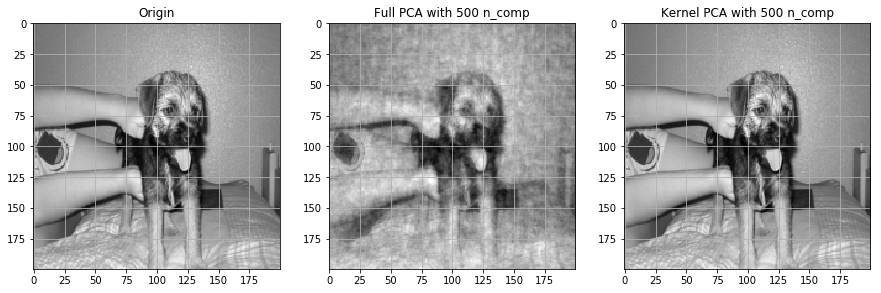

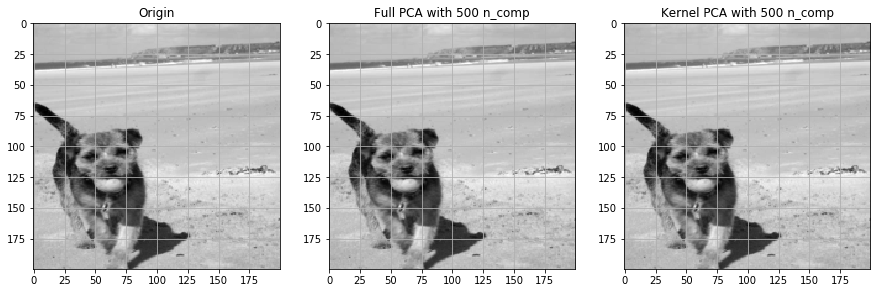

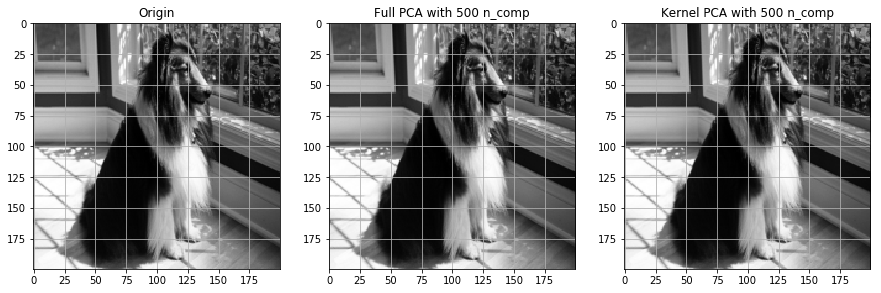

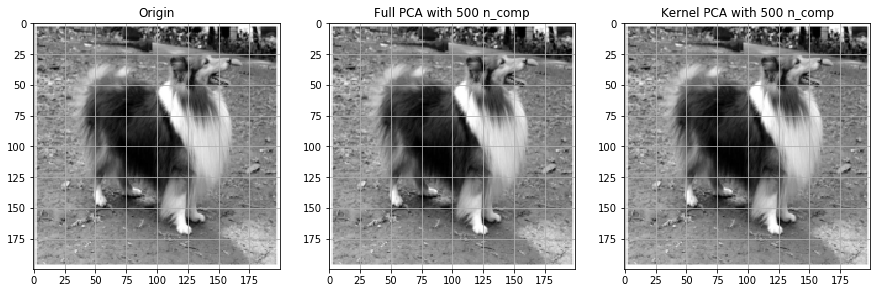

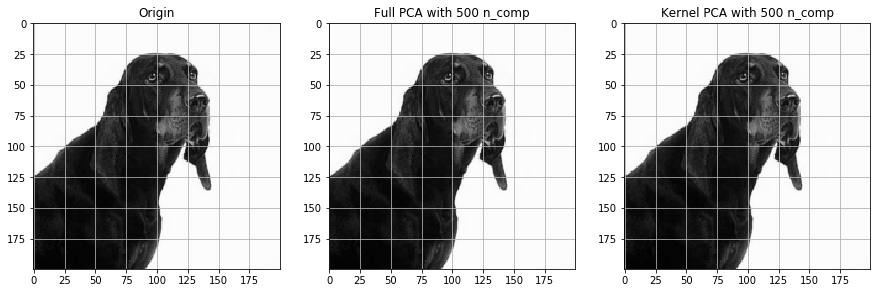

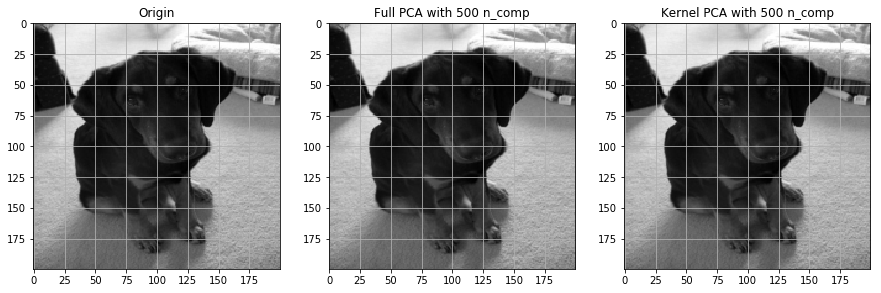

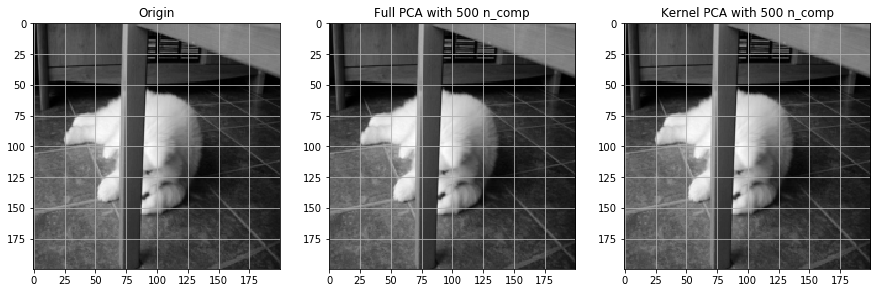

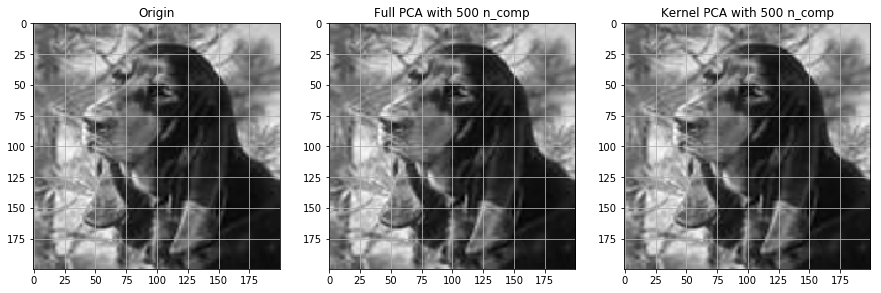

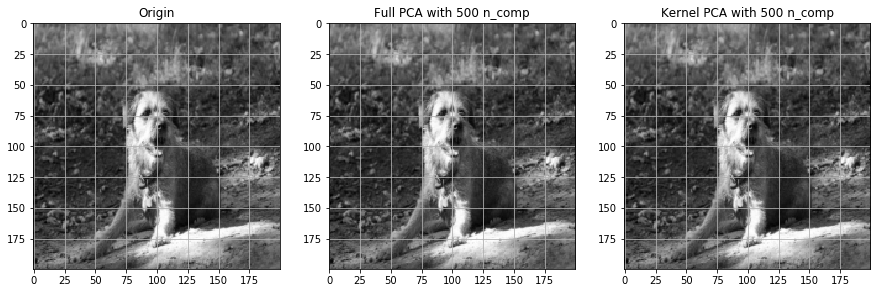

In [403]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

from ipywidgets import widgets  


def plt_reconstruct(dogs_to_reconstruct):
    
    reconstructed_image = pca.inverse_transform(pca.transform(dogs_blood[dogs_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(dogs_blood[dogs_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,3,1)
    plt.imshow(dogs_blood[dogs_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)
    plt.title("Origin")
    plt.grid()
    
    plt.subplot(1,3,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA with 500 n_comp')
    plt.grid()
    
    plt.subplot(1,3,3)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Kernel PCA with 500 n_comp')
    plt.grid()
    
widgets.interact(plt_reconstruct,dogs_to_reconstruct=100,__manual=True)

        According to the comparsion above, with the same number of components, kernal PCA would do a much better job than regular full PCA. The image quality of reconstructed by kernal PCA is close to the origin, while the images reconsturcted from regular PCA is still unclear in some cases. The time comparision now is 3 minutes of kernal PCA and 8 seconds of regular PCA. 

        Let's see the comparison when we raise the number of components to maximum for regular PCA.

In [409]:
n_components = 1000
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, dogs.shape[0]))
pca = PCA(n_components=n_components)
%time pca.fit(dogs_blood.copy())

Extracting the top 1500 eigenfaces from 3000 faces
Wall time: 5.84 s


PCA(copy=True, iterated_power='auto', n_components=1500, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<function __main__.plt_reconstruct>

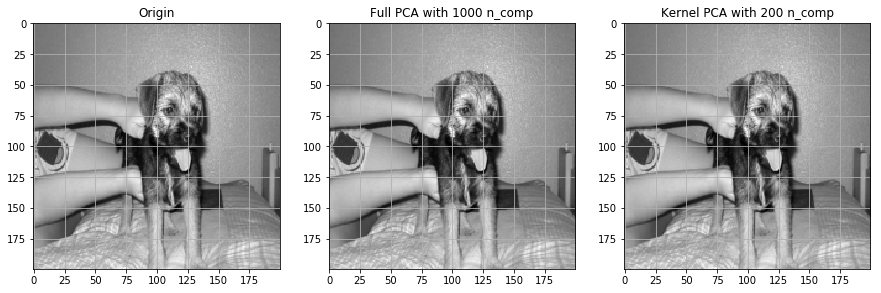

In [411]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

from ipywidgets import widgets  


def plt_reconstruct(dogs_to_reconstruct):
    
    reconstructed_image = pca.inverse_transform(pca.transform(dogs_blood[dogs_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(dogs_blood[dogs_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,3,1)
    plt.imshow(dogs_blood[dogs_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)
    plt.title("Origin")
    plt.grid()
    
    plt.subplot(1,3,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA with 1000 n_comp')
    plt.grid()
    
    plt.subplot(1,3,3)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Kernel PCA with 200 n_comp')
    plt.grid()
    
widgets.interact(plt_reconstruct,dogs_to_reconstruct=100,__manual=True)

        For some reason, the implementation takes less time for regular PCA to reach it's maximum performance. The kernal PCA requires less number of components, but it's also taking much more time for processing. It takes 3 minutes for kernal PCA to reach the wanted performance while the regular full PCA only needs 5 seconds. Therefore, we prefer regular full PCA to do the dimensionality reduction since it takes less time. It took more than an hour for kernal PCA's implementation when we was trying to apply that for the 3000 images.  